In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
#train dataset for XOR , truth table of XOR
train_X = np.array([[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]])
train_X

array([[0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.]])

In [37]:
#Output for XOR, based on index, if index 0 is 1 : i.e output is 0, if index 1 is 1 : otput is 1
train_Y = np.array([[1.0, 0.0], [0.0, 1.0], [0.0, 1.0], [1.0, 0.0]])
train_Y

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [22]:
#making the test dataset
test_X = np.array([[1.0, 0.0], [0.0 , 0.0]])
test_X

array([[1., 0.],
       [0., 0.]])

In [38]:
#output for test
test_Y = np.array([[0.0, 1.0], [1.0, 0.0]])
test_Y

array([[0., 1.],
       [1., 0.]])

In [39]:
#Defininf the MLP
class Neural_Network(object):
  def __init__(self):
    self.layer_numberofnodes=list()
    self.W=list()
#     self.inputSize = int(input('No .of nodes in input layer :'))
#     self.outputSize = int(input('No. of nodes in output layer :'))
#     self.nhiddenlayers= int((input('No of hidden layers :')))
    self.inputSize = 2
    self.layer_numberofnodes.append(self.inputSize)
    self.outputSize = 2
    self.nhiddenlayers = 1

#     for i in range(self.nhiddenlayers):
#       print("No. of nodes in hidden layer {} : ".format(i+1))
#       self.layer_numberofnodes.append(int(input()))
    self.layer_numberofnodes.append(2)
    self.layer_numberofnodes.append(self.outputSize)

    self.layerlist=[None]*(self.nhiddenlayers + 2)

    #weights
    for i in range(len(self.layer_numberofnodes)-1):
      self.W.append(np.random.randn(self.layer_numberofnodes[i],self.layer_numberofnodes[i+1]))

  def forward(self, X):

    self.layerlist[0]=X
    self.z =  np.dot(X, self.W[0]) 
    for i in range(1,(len(self.W))):
      #print('length layer list iteration {} = {} start'.format(i,len(self.layerlist)))
      self.z = self.sigmoid(self.z)
      self.layerlist[i]=self.z
      self.z = np.dot(self.z,self.W[i])
      #print('length layer list iteration {} = {} end'.format(i,len(self.layerlist)))
    o=self.sigmoid(self.z)
    self.layerlist[self.nhiddenlayers+1]=o
    return o 

  def sigmoid(self, s):
    # activation function 
    return 1/(1+np.exp(-s))

  def sigmoidPrime(self, s):
    #derivative of sigmoid
    return s * (1 - s)

  def Relu(self, s):
    return np.maximum(0,s)

  def ReluPrime(self,s):
    if(s==0): 
      return 0
    else:
      return 1
  def backward(self, X, y, o,lr):

    self.z_error = y - o
    for i in range(len(self.layerlist)-1,0,-1):
      self.z_delta = self.z_error*self.sigmoidPrime(self.layerlist[i])
      self.z_error = self.z_delta.dot(self.W[i-1].T ) 
      self.W[i-1] += lr*self.layerlist[i-1].T.dot(self.z_delta)

  def train (self, X, y,lr):
    o = self.forward(X)
    self.backward(X, y, o,lr)


In [40]:
#defining test_loss_values for storing test_loss values against multiple learning rates
test_loss_values = []
learning_rate_values = [float(i) for i in [0.5, 0.1, 0.05, 0.01, 0.001, 0.0001, 0.00001]]

In [41]:
#computing loss values against different learning rates
for i in range(len(learning_rate_values)):
    print("\nIteration ", i+1, "\nLearning rate : ", learning_rate_values[i])
    NN = Neural_Network()
    epoch = 5
    learning_rate = learning_rate_values[i]
    for q in range(int(epoch)): # trains the NN 1,000 times
      #print ("Input: \n" + str(X))
    #   print ("Actual Output: \n" + str(y))
      print ("Training Loss: \n" + str((np.mean(np.square(train_Y - NN.forward(train_X))))))# mean sum squared loss
      NN.train(train_X, train_Y, learning_rate)
    test_loss_values.append((np.mean(np.square(test_Y - NN.forward(test_X)))))
    print ("Test Loss: \n" + str(test_loss_values[i]))# mean sum squared loss


Iteration  1 
Learning rate :  0.5
Training Loss: 
0.2987439699304221
Training Loss: 
0.29281608012178434
Training Loss: 
0.28752307567963353
Training Loss: 
0.28291350287204875
Training Loss: 
0.27898046187217607
Test Loss: 
0.2405944086622657

Iteration  2 
Learning rate :  0.1
Training Loss: 
0.25447675973760686
Training Loss: 
0.2543630698260575
Training Loss: 
0.2542518920291589
Training Loss: 
0.2541431672853944
Training Loss: 
0.254036837989256
Test Loss: 
0.27898772945665484

Iteration  3 
Learning rate :  0.05
Training Loss: 
0.2557277135128583
Training Loss: 
0.25563420359373823
Training Loss: 
0.2555419613222878
Training Loss: 
0.2554509729285349
Training Loss: 
0.25536122470133515
Test Loss: 
0.27020917528576394

Iteration  4 
Learning rate :  0.01
Training Loss: 
0.25130559331640834
Training Loss: 
0.25130156370771195
Training Loss: 
0.2512975472148235
Training Loss: 
0.25129354379544655
Training Loss: 
0.2512895534074172
Test Loss: 
0.25077808555926573

Iteration  5 
Lea

Text(0, 0.5, 'test loss')

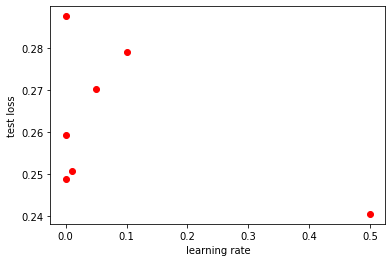

In [42]:
#plotting loss_value v/s learning rate
test_loss_values
plt.plot(learning_rate_values, test_loss_values, 'ro')
plt.xlabel("learning rate")
plt.ylabel("test loss")

In [43]:
#for the best observed learning rate, using the neural network to predict the test outputs 
NN = Neural_Network()  
learning_rate = 0.5
NN.train(train_X, train_Y, learning_rate)
epoch = 5
for q in range(int(epoch)): # trains the NN 1,000 times
    print ("Training Loss: \n" + str((np.mean(np.square(train_Y - NN.forward(train_X))))))# mean sum squared loss
    NN.train(train_X, train_Y, learning_rate)

print ("Test Loss: \n" + str(np.mean(np.square(test_Y - NN.forward(test_X)))))

Training Loss: 
0.2646579571178097
Training Loss: 
0.26361980494351533
Training Loss: 
0.2626413276563744
Training Loss: 
0.26172214716129294
Training Loss: 
0.2608613800653824
Test Loss: 
0.21513881727850245


In [44]:
#feed forward prediction on the test dataset
output = NN.forward(test_X)

In [47]:
#calculating predictions for the test dataset
y_predicted = []
for row in output : 
    y_predicted.append(np.argmax(row))
y_predicted = np.array(y_predicted)
y_predicted

array([0, 0])

In [52]:
#considering actual test output for predicted dataset
y_test_output = []
for row in test_Y : 
    y_test_output.append(np.argmax(row))
y_test_output = np.array(y_test_output)
y_test_output

array([1, 0])

In [55]:
#computing the confusion matrix for the dataset
confusion_matrix = np.zeros([2,2])
for i in range(2):
    confusion_matrix[y_test_output[i]][y_predicted[i]] += 1
        
print(confusion_matrix)

[[1. 0.]
 [1. 0.]]


In [56]:
#getting true positive using confusion matrix
TruePositive = np.diag(confusion_matrix) 
TruePositive

array([1., 0.])

In [59]:
#getting false positive using confusion matrix
FalsePositive = []
for i in range(2): 
    FalsePositive.append(sum(confusion_matrix[:,i]) - confusion_matrix[i,i])
FalsePositive

[1.0, 0.0]

In [61]:
#getting False Negative using confusion matrix
FalseNegative = []
for i in range(2): 
    FalseNegative.append(sum(confusion_matrix[i, :]) - confusion_matrix[i,i])
FalseNegative

[0.0, 1.0]

In [62]:
#getting true negative using confusion matrix
TrueNegative = []
for i in range(2): 
    temp = np.delete(confusion_matrix, i, 0) # delete ith row 
    temp = np.delete(temp, i, 1) # delete ith column 
    TrueNegative.append(sum(sum(temp))) 
TrueNegative


[0.0, 1.0]

In [63]:
#computing classwise accuracy precision recall and F-Score
for i in range(2):
    print("\nClass ", i+1)
    print("Accuracy : ", (TruePositive[i] + TrueNegative[i]) / (TruePositive[i] + TrueNegative[i] + FalsePositive[i] + FalseNegative[i]))
    precision = (TruePositive[i]) / (TruePositive[i] + FalsePositive[i])
    print("Precision : ", precision)
    recall = (TruePositive[i]) / (TruePositive[i] + FalseNegative[i])
    print("Recall : ", recall)
    print("F-Score : ", (2 * precision * recall) / (precision + recall))


Class  1
Accuracy :  0.5
Precision :  0.5
Recall :  1.0
F-Score :  0.6666666666666666

Class  2
Accuracy :  0.5
Precision :  nan
Recall :  0.0
F-Score :  nan


/usr/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
